<a href="https://colab.research.google.com/github/vic1030/Data_Science_Learning/blob/main/%E6%89%80%E6%9C%89%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%2BMSE(R2)%2B%E6%AD%A3%E5%88%99%E5%8C%96%EF%BC%88L1%2BL2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 线性回归

算法推导过程中已经给出了求解方法，基于最小二乘法直接求解，但这并不是机器学习的思想，由此引入了梯度下降方法。本次实验课重点讲解其中每一步流程与实验对比分析。

### 主要内容：
* 线性回归方程实现
* 梯度下降效果
* 对比不同梯度下降策略
* 建模曲线分析
* 过拟合与欠拟合
* 正则化的作用
* 提前停止策略

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### 回归方程：
当做是一个巧合就可以了，机器学习中核心的思想是迭代更新

![title](./img/线性回归/1.png)

In [2]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+ 3*X +np.random.randn(100,1) #随机构造一个数据点

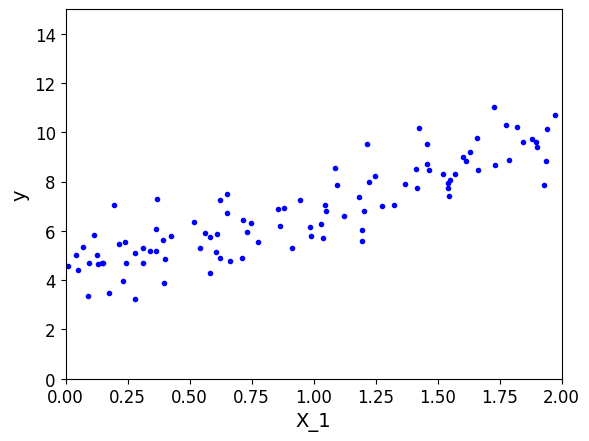

In [3]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show() #画出随机点后，要构建一个回归方程，这个方程要尽可能拟合这些数据点

In [4]:
X_b = np.c_[np.ones((100,1)),X] #加上X0控制偏制项，全为1，这样后续可以做矩阵乘法。做拼接
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)#转置+求逆

In [5]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [5]:
theta_best #当前最优结果

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0],[2]]) #创建新的数据，起始为0，终点为2
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)#对数据点进行预测
y_predict

array([[4.21509616],
       [9.75532293]])

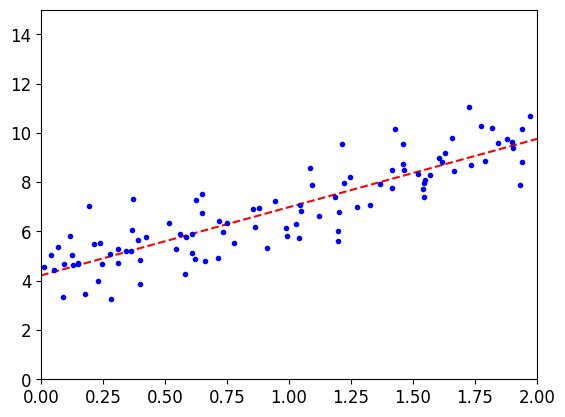

In [7]:
plt.plot(X_new,y_predict,'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

### sklearn api文档：
不用背，用到的时候现查完全够用的。
https://scikit-learn.org/stable/modules/classes.html

In [8]:
#接下来介绍的是以上方法使用工具包后的样子
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print (lin_reg.coef_) #权重参数
print (lin_reg.intercept_) #偏置参数

[[2.77011339]]
[4.21509616]


### 梯度下降
核心解决方案，不光在线性回归中能用上，还有其他算法中能用上，比如神经网络

![title](./img/线性回归/2.png)

#### 问题：步长太小

![title](./img/线性回归/3.png)

#### 问题：步长太大

![title](./img/线性回归/4.png)

![title](./img/线性回归/5.png)

学习率应当尽可能小，随着迭代的进行应当越来越小。

### 标准化的作用:
- **拿到数据之后基本上都需要做一次标准化操作**
标准化就是为了让数据的取值范围基本相近
https://scikit-learn.org/stable/api/sklearn.preprocessing.html #预处理工具包

![title](./img/线性回归/6.png)

### 批量梯度下降计算公式

![title](./img/线性回归/7.png)

### 批量梯度下降
**P31-4**


In [9]:
eta = 0.1 #学习率
n_iterations = 1000 #迭代次数
m = 100 #样本个数
theta = np.random.randn(2,1) #对权重化做一个随机的初始化
for iteration in range(n_iterations): #进行一个迭代
    gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [12]:
theta_path_bgd = []
def plot_gradient_descent(theta,eta,theta_path = None): #画图函数
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations): #随着迭代的进行，结果如何变化
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,'b-')
        gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('eta = {}'.format(eta))

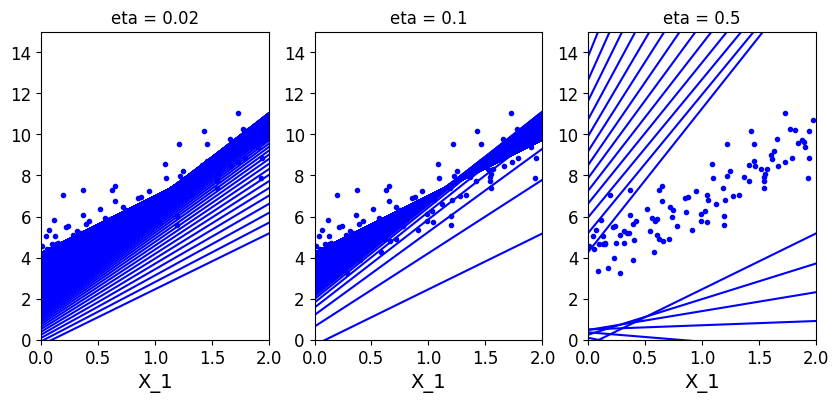

In [13]:
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta = 0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta = 0.5)
plt.show()
#通过此实验，明白学习率宁可小也不愿大


### 随机梯度下降
**P33—6**

![title](./img/线性回归/8.png)

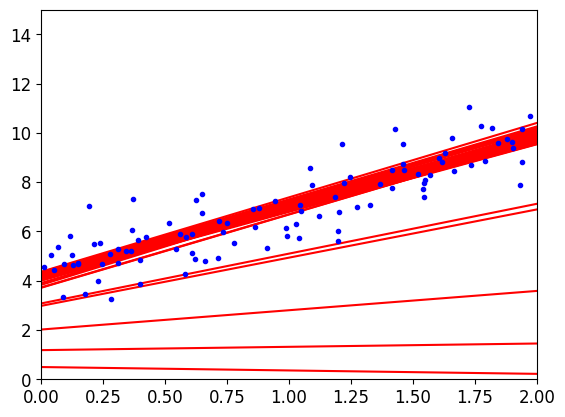

In [14]:
theta_path_sgd=[]
m = len(X_b)
np.random.seed(42)
n_epochs = 50

t0 = 5 #分子
t1 = 50 #分母

def learning_schedule(t): #指定衰减策略，先全局搜索，后局部搜索
    return t0/(t1+t) #return衰减后的结果，随着迭代进行次数增加，分母越来越大，分子保持不变，结果就越来越小

theta = np.random.randn(2,1) #theta重新初始化

for epoch in range(n_epochs): #epoch值表示你遍历了一遍数据集当中每一个样本
    for i in range(m):
        if epoch < 10 and i<10: #之画前几部epoch值
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        random_index = np.random.randint(m) #选择随机一个样本，随机指定一个索引
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i) #计算衰减后的新的学习率
        theta = theta-eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()





### MiniBatch梯度下降
**P34_7**
**MINI BATCH就是拿小部分样本算梯度更新参数**

In [15]:
theta_path_mgd=[]
n_epochs = 50
minibatch = 16 #一般喜欢用2的幂值
theta = np.random.randn(2,1)
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)
np.random.seed(42) #如果想让每次实验尽可能相同可以指定随机种子
t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m) #对数据进行洗牌
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch):
        t+=1
        xi = X_b_shuffled[i:i+minibatch]
        yi = y_shuffled[i:i+minibatch]
        gradients = 2/minibatch* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta = theta-eta*gradients
        theta_path_mgd.append(theta)

In [16]:
theta

array([[4.25490685],
       [2.80388784]])

### 3种策略的对比实验
**P35_8**

In [17]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

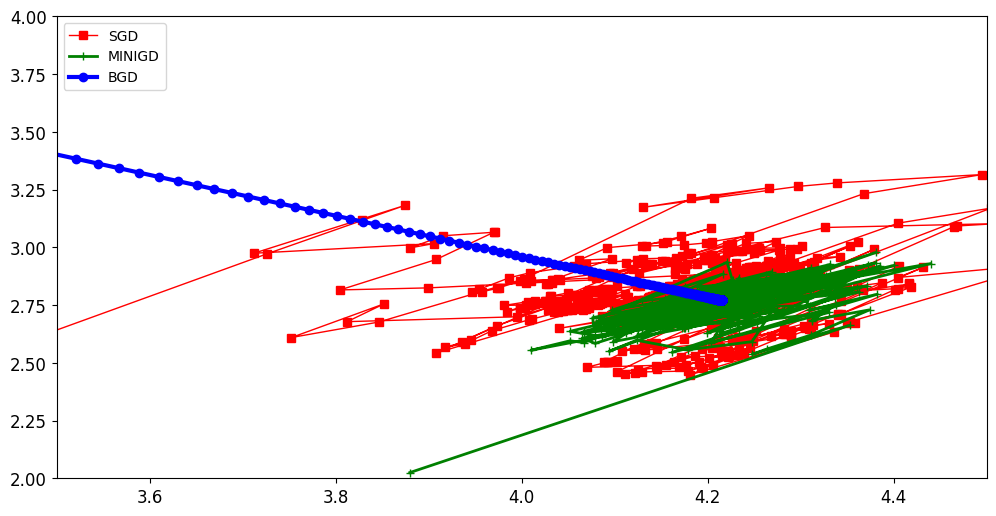

In [18]:
plt.figure(figsize=(12,6))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',linewidth=1,label='SGD')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',linewidth=2,label='MINIGD')
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',linewidth=3,label='BGD')
plt.legend(loc='upper left')
plt.axis([3.5,4.5,2.0,4.0])
plt.show()
#一般用绿色的批量下降


实际当中用minibatch比较多，一般情况下选择batch数量应当越大越好。

### 多项式回归
**P36_9**

In [19]:
#定义曲线方程
m = 100
X = 6*np.random.rand(m,1) - 3 #范围-3到3
y = 0.5*X**2+X+np.random.randn(m,1) #分别算0，0.1，0.5，1

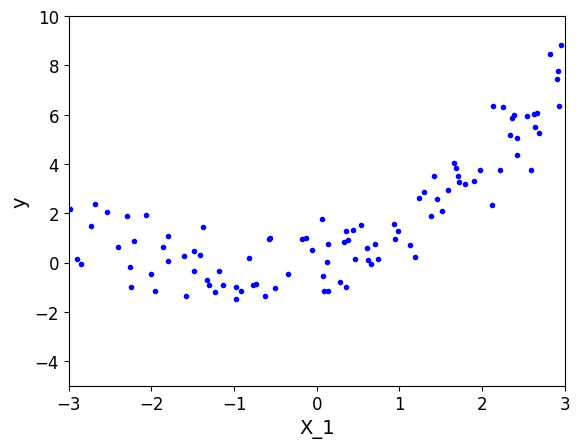

In [20]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,-5,10])
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
#This code snippet initializes a PolynomialFeatures object to transform the features into a polynomial with a degree of 2.
poly_features = PolynomialFeatures(degree = 2,include_bias = False) #include_bias=False: Ensures that the transformed features do not include a bias term (an intercept).
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [23]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [22]:
2.38942838 ** 2

5.709367983149424

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print (lin_reg.coef_)
print (lin_reg.intercept_)
#y= 0.9x+0.52x^2-0.26 该术语0.9x代表线性分量。0.52x^2代表二次分量。-0.26是截距。

[[0.95038538 0.52577032]]
[-0.0264767]


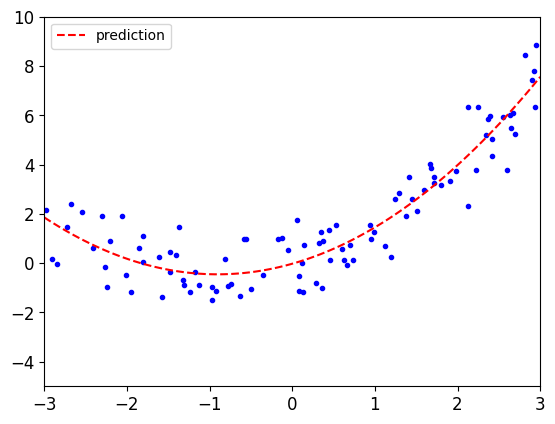

In [24]:
X_new = np.linspace(-3,3,100).reshape(100,1) #A new dataset X_new is created for making predictions
X_new_poly = poly_features.transform(X_new)# Transforms the new dataset into polynomial features.
y_new = lin_reg.predict(X_new_poly) #The model is used to make predictions on the new polynomial features
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r--',label='prediction')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()
#该模型捕捉特征X和目标变量之间的二次关系y，与简单的线性回归模型相比，可以更好地拟合非线性数据。

###P37-10 模型复杂度

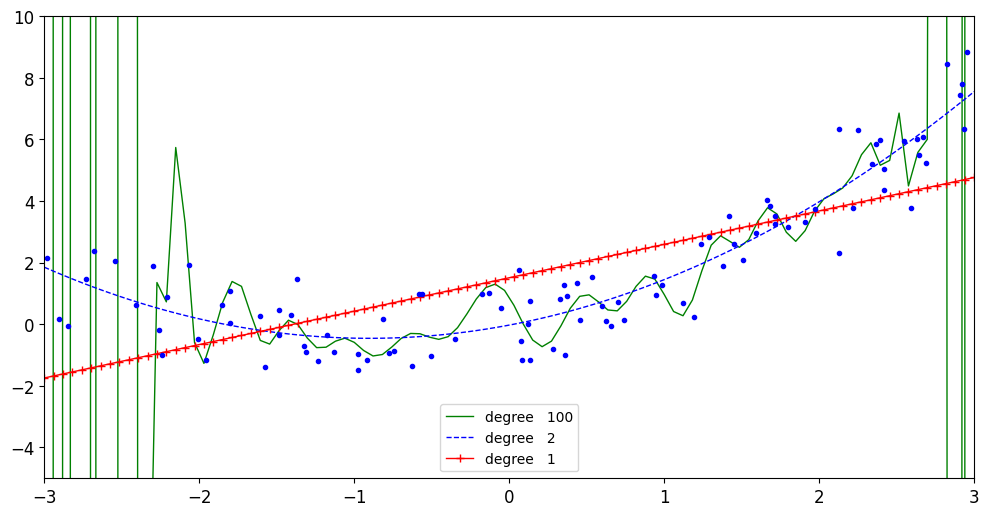

In [25]:
#第一步：导入库并初始化数据
#不同的degree的对比实验，
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#第二步：设定情节
plt.figure(figsize=(12,6)) # 设置一个尺寸为 12 英寸 x 6 英寸的图形
#第三步：循环遍历不同的多项式次数
for style,width,degree in (('g-',1,100),('b--',1,2),('r-+',1,1)): #此循环遍历包含多项式特征的样式、线宽和度值的不同元组
    #第四步：创建并使用管道，在循环内部，Pipeline为每个degree创建并使用
    poly_features = PolynomialFeatures(degree = degree,include_bias = False)#将原始特征转换为指定次数的多项式特征
    std = StandardScaler() #标准化使其平均值为 0，标准差为 1。这对于许多机器学习算法的最佳性能非常重要。
    lin_reg = LinearRegression()#将线性回归模型与转换和标准化的特征进行拟合
    polynomial_reg = Pipeline([('poly_features',poly_features),
             ('StandardScaler',std),
             ('lin_reg',lin_reg)])#确保Pipeline多项式变换、标准化和线性回归按顺序应用
    polynomial_reg.fit(X,y)
    y_new_2 = polynomial_reg.predict(X_new) #使用适合的管道对新数据进行预测
    #画图
    plt.plot(X_new,y_new_2,style,label = 'degree   '+str(degree),linewidth = width)
plt.plot(X,y,'b.')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

#summary：代码比较了不同阶数（1、2 和 100）的多项式回归模型。Pipeline通过将多项式特征变换、标准化和线性回归链接到单个对象中，简化了流程

特征变换的越复杂，得到的结果过拟合风险越高，不建议做的特别复杂。
**蓝色的效果是最好的，绿色过拟合**

### 数据样本数量对结果的影响
**P38_11**

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    """
     train_test_split:将数据分为训练集和验证集.
     test_size=0.2: 意味着 20％ 的数据用于验证，80％ 用于训练
     random_state=100: 确保拆分可重现。设置种子（此处为 100）可确保每次运行代码时都会发生相同的拆分。
    """
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state=100)
    train_errors,val_errors = [],[] #初始化错误列表
    for m in range(1,len(X_train)): #循环迭代增加训练集的大小（从 1 到全尺寸）
        model.fit(X_train[:m],y_train[:m]) #在第一个样本上训练模型m
        y_train_predict = model.predict(X_train[:m])#训练集结果
        y_val_predict = model.predict(X_val)#验证集结果
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m])) #计算训练和验证集的 MSE，MSE抖动太大。其实这里使用rmse更合适一些。所以plot的时候加了根号
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth = 2,label = 'train_error')
    plt.plot(np.sqrt(val_errors),'b-',linewidth = 3,label = 'val_error')
    plt.xlabel('Trainsing set size')
    plt.ylabel('RMSE')
    plt.legend()

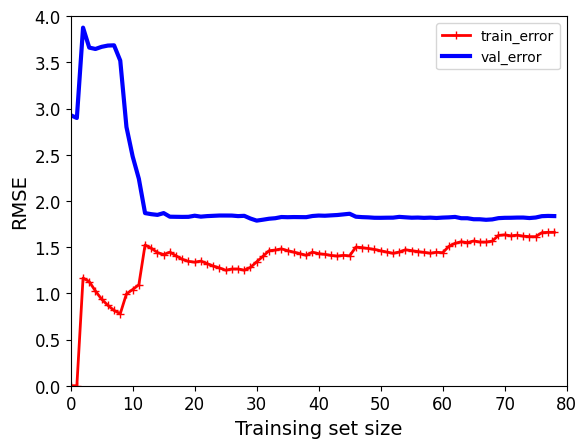

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,4])
plt.show()

**数据量越少，训练集的效果会越好，但是实际测试效果很差。数据量大过拟合风险会降低，效果越稳定。实际做模型的时候需要参考测试集和验证集的效果。样本少欠拟合，样本多会过拟合**

### 多项式回归的过拟合风险 p39-2

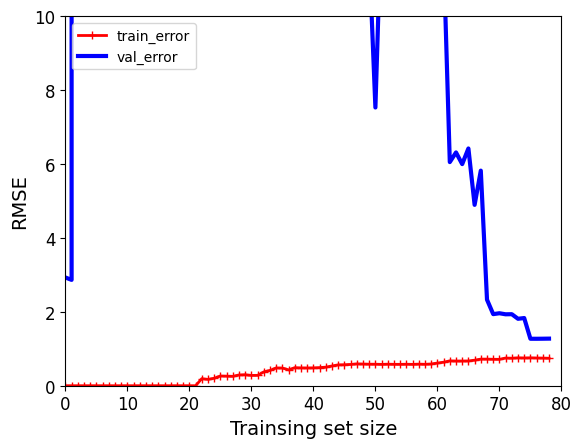

In [33]:
polynomial_reg = Pipeline([('poly_features',PolynomialFeatures(degree = 25,include_bias = False)), #degree越大，过拟合风险越高
             ('lin_reg',LinearRegression())])
plot_learning_curves(polynomial_reg,X,y)
plt.axis([0,80,0,10])
plt.show()

越复杂越过拟合

### 正则化为了过拟合风险而产生的 P39—2

对权重参数进行惩罚，让权重参数尽可能平滑一些，有两种不同的方法来进行正则化惩罚:

![title](./img/线性回归/9.png)

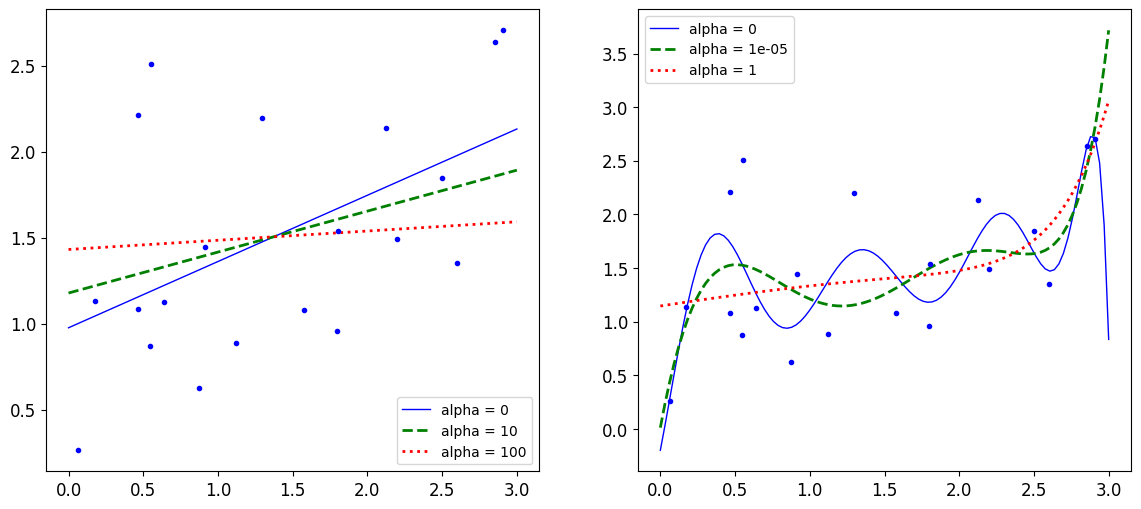

In [35]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3*np.random.rand(m,1)
y = 0.5 * X +np.random.randn(m,1)/1.5 +1
X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_calss,polynomial,alphas,**model_kargs):
    for alpha,style in zip(alphas,('b-','g--','r:')):
        model = model_calss(alpha,**model_kargs)
        if polynomial:
            model = Pipeline([('poly_features',PolynomialFeatures(degree =10,include_bias = False)),
             ('StandardScaler',StandardScaler()),
             ('lin_reg',model)])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth = lw,label = 'alpha = {}'.format(alpha))
    plt.plot(X,y,'b.',linewidth =3)
    plt.legend()

plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas = (0,10,100))
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas = (0,10**-5,1))
plt.show()

**ridge回归是通过调节alpha值来构建更稳定的模型。**

右图中的蓝线就是没有使用ridge的多项式方程，肉眼可见的是红色更平稳。

惩罚力度越大，alpha值越大的时候，得到的决策方程越平稳。

![title](./img/线性回归/10.png)

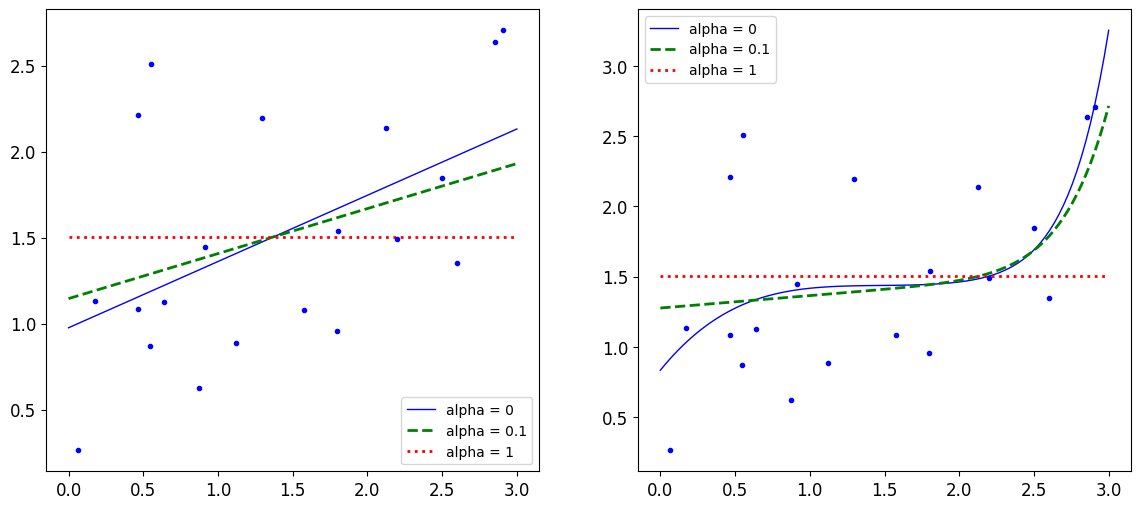

In [36]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas = (0,0.1,1))
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas = (0,10**-1,1))
plt.show()

多做实验，得出结果！！！

In [ ]:
"""
https://developer.aliyun.com/article/1105048#:~:text=R2(%20Coefficient%20of%20determination)%EF%BC%9A,%E5%90%88%E7%9A%84%E4%B9%9F%E8%BE%83%E5%A5%BD%E3%80%82
【机器学习技巧】回归模型的几个常用评估指标（R2、Adjusted-R2、MSE、RMSE、MAE、MAPE）及其在sklearn中的调用方式

https://daizhu.one/?p=293
均方误差MSE与均方根误差RMSE

https://blog.csdn.net/u012735708/article/details/84337262
回归评价指标：MSE、RMSE、MAE、R2、Adjusted R2

Summary:

1. MSE（mean_squared_error）：均方误差

mean_squared_error：该指标计算的是拟合数据和原始数据对应样本点的误差的平方和的均值，其值越小说明拟合效果越好。

2. MAE（mean_absolute_error）：平均绝对误差

mean_absolute_error：用于评估预测结果和真实数据集的接近程度的程度，其值越小说明拟合效果越好。

MSE、MAE思路是测试数据集中的点，距离模型的平均距离越小，该模型越精确（所以值越小说明拟合效果越好）。使用平均距离，而不是所有测试样本的距离和，因为距离和受样本数量的影响。

3. R2(R Squared) :判定系数，其含义是也是解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量的方差变化，希望这个值越大越好，值越小则说明效果越差。R2是衡量线性回归法最好的指标。
R2 <= 1
R2越大越好，当自己的预测模型不犯任何错误时：R2 = 1
当我们的模型等于基准模型时：R2 = 0
如果R2 < 0，说明学习到的模型还不如基准模型。很可能数据不存在任何线性关系。

什么时候用mse和rmse？

mse: 严厉惩罚较大的错误：如果你希望你的模型对较大的错误非常敏感，那么 MSE 是一个很好的选择，因为它可以对错误进行平方，从而使较大的错误更具影响力。
rmse: 可解释性：如果您需要一个更容易理解的指标，因为它与原始数据的单位相同（如美元、米等），那么 RMSE 会更好。
一般性能报告：当您想要以一种其他人容易理解的方式报告模型的运行情况时，RMSE 是一个不错的选择。

实例：
想象一下你正在预测房价：

MSE：告诉您预测房价与实际房价之间的平均平方差。MSE 越低，意味着您的预测越接近实际价格。
RMSE：以与房价相同的单位（如美元）告诉你平均误差。这可以更轻松地解释，例如，“平均而言，我们的预测偏差了 30,000 美元。”
关键点：
MSE在训练过程中使用得更多，因为它简单并且优化效果很好。
RMSE通常用于最终报告和评估，因为它更容易解释。
"""


In [ ]:
"""
对于L1 lasso回归和L2 ridge回归：

解决的问题 :
普通线性回归通常用于建模和预测，但在存在多重共线性时容易过拟合。
岭回归主要用于解决多重共线性问题，可以稳定估计，但不进行特征选择。
Lasso 回归用于解决多重共线性问题，并且可以进行特征选择，有助于提取最重要的特征。

在岭回归和Lasso回归中，正则化参数(α)用于控制正则化的强度。较大的α值会导致更强的正则化，推动 回归系数向零缩小。
普通线性回归没有正则化参数。

特征选择 :
普通线性回归不进行特征选择，使用所有特征。
岭回归倾向于减小回归系数但不会消除它们，不进行特征选择。
Lasso 回归可以将某些系数压缩为零，实现特征选择，使模型更稀疏。

选择哪种回归方法取决于问题的性质和对特征选择的需求。如果你需要稳定的估计并且不需要进行特征选择，岭回
归可能是一个好选择。
如果你想要自动进行特征选择，Lasso回归可能更合适。正则化参数的选择通常需要通过交叉验证等技术来确定。
"""